In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Metrics, Classifier and Graphing Packages
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import seaborn as sns # for confusion matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # to plot image, graph

import pickle
import time # for computation time assessment
%matplotlib inline

In [3]:
x_path = '/content/drive/MyDrive/Data/X.pickle'
y_path = '/content/drive/MyDrive/Data/y.pickle'

X = pickle.load(open(x_path, 'rb'))
y = pickle.load(open(y_path, 'rb'))


pickle_in = open("/content/drive/MyDrive/Data/data.pickle", "rb")
data = pickle.load(pickle_in) # 2-D Feature Set, Data matrix will serve as X


In [4]:
print('# of Samples:', len(y))
print('# of Without A Mask:', (y == 0).sum())
print('# of Incorrectly Worn Mask:', (y == 1).sum())
print('# of With A Mask:', (y == 2).sum())

# of Samples: 17529
# of Without A Mask: 5909
# of Incorrectly Worn Mask: 5737
# of With A Mask: 5883


In [5]:
cols = []
for i in range(0, len(data[0])):
    cols.append("P" + str(i))

# Convert to Dataframe
numpy_data = data
X = pd.DataFrame(data=numpy_data, columns=[cols])
print(X.head())

y = pd.DataFrame(data=y, columns=["Mask_Target"])
print(y.head())

    P0   P1   P2   P3   P4   P5   P6  ... P4089 P4090 P4091 P4092 P4093 P4094 P4095
0  253  252  253  253  250  248  249  ...   115   102   110   106   103   108   107
1  205  195  202  136   76   77   56  ...    43    42    35    39    43    41    32
2   97   97   96   96   93   94   97  ...    61    59    66    77    80    83    80
3   72   69   71   70   70   74   79  ...    71    64    60    41    29    49    72
4   69   59   67   76   85   86   85  ...   217   213   206   207   189    98    43

[5 rows x 4096 columns]
   Mask_Target
0            0
1            0
2            0
3            0
4            0


In [6]:

print('\nImage Data Shape:', X.shape) # Feature sets are 64X64 images flatten to a 4096 feature vector
print('Image Data Shape Features:', data.shape)
print('Image Data Shape Target:', y.shape)


Image Data Shape: (17529, 4096)
Image Data Shape Features: (17529, 4096)
Image Data Shape Target: (17529, 1)


In [7]:
# Normalize the pixel values
X = X / 255.0

In [8]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Print the length and width of our testing data.
print('Length of our Training data: ', len(X_train), '\nLength of our Testing data: ', len(X_test))

Length of our Training data:  14023 
Length of our Testing data:  3506


In [9]:
# Initialize Decision Trees model, No hyperparameter Tuning
decision_trees = DecisionTreeClassifier()

# Use training data to fit Decision Trees model
decision_trees.fit(X_train, y_train.values.ravel())

# Predict Train Data Labels
predictions_set = decision_trees.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [14]:
predictions_set1 = decision_trees.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [15]:
# Save Predictions in a pickle
pickle_out = open("predictions_set1.pickle", "wb")
pickle.dump(predictions_set1, pickle_out)
pickle_out.close()

Text(0.5, 1.0, 'Accuracy Score, No Hyperparameter Tuning: 0.8183114660581859')

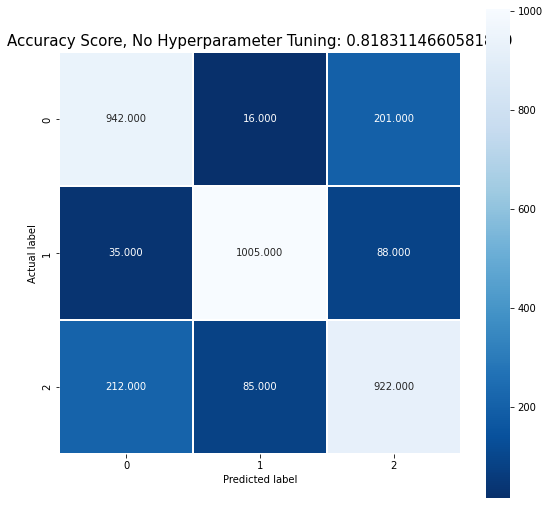

In [16]:
cm = confusion_matrix(y_test, predictions_set)

plt.figure(figsize=(9,9))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score, No Hyperparameter Tuning: {0}'.format(accuracy_score(y_test, predictions_set))
plt.title(title,size=15)

In [18]:
print('Decision Trees Precision: %.3f' % precision_score(y_test, predictions_set1, average='micro'))
print('Decision Trees Recall: %.3f' % recall_score(y_test, predictions_set1, average='micro'))
print('Decision Trees F1 Score: %.3f' % f1_score(y_test, predictions_set1, average='micro'))

Decision Trees Precision: 0.818
Decision Trees Recall: 0.818
Decision Trees F1 Score: 0.818


In [19]:
print("\nClassification Report\n", classification_report(y_test, predictions_set1))


Classification Report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1159
           1       0.91      0.89      0.90      1128
           2       0.76      0.76      0.76      1219

    accuracy                           0.82      3506
   macro avg       0.82      0.82      0.82      3506
weighted avg       0.82      0.82      0.82      3506



In [17]:
best_max_depth = 10
best_max_feature = 1138
best_min_samples_split = 0.1 # consider also excluding due to underperformance in parameter exploration

dt = DecisionTreeClassifier(max_features=best_max_feature, max_depth=10, min_samples_split=best_min_samples_split)
dt.fit(X_train, y_train)
train_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)

print("For max feature:", best_max_feature, ", max_depth:", best_max_depth, ", min samples_split:", best_min_samples_split)
print('===== Accuracy Train: %.3f' % accuracy_score(y_train, train_pred))
print('===== Accuracy Test: %.3f' % accuracy_score(y_test, y_pred))
print("\nClassification Report\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


For max feature: 1138 , max_depth: 10 , min samples_split: 0.1
===== Accuracy Train: 0.774
===== Accuracy Test: 0.755

Classification Report
               precision    recall  f1-score   support

           0       0.72      0.80      0.76      1159
           1       0.88      0.82      0.85      1128
           2       0.69      0.65      0.67      1219

    accuracy                           0.75      3506
   macro avg       0.76      0.76      0.76      3506
weighted avg       0.76      0.75      0.76      3506



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
